# Sleep Health and Lifestyle

## Pertanyaan Bisnis
1. Apa saja jenis pekerjaan yang dilakukan oleh individu dalam kelompok umur yang memiliki langkah harian terendah dibandingkan dengan mereka yang berada dalam kelompok umur dengan langkah harian tertinggi?
2. Apa saja jenis pekerjaan yang dilakukan oleh individu dalam kelompok umur yang memiliki rata-rata waktu tidur lebih dari rata-rata waktu tidur populasi?
3. Apa kategori BMI yang paling banyak ditemukan di antara individu dengan pekerjaan di sektor kesehatan?
4. Apa sektor pekerjaan yang memiliki proporsi tertinggi individu yang mengalami insomnia?
5. Dari berbagai pekerjaan, yang manakah paling umum di antara individu dalam kategori "Overweight"?

## Import Library

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

In [2]:
#!/bin/bash
#!pip install kaggle
#!kaggle datasets download uom190346a/sleep-health-and-lifestyle-dataset
#!zip sleep-health-and-lifestyle-dataset

## Data Wrangling

### Gathering Data
Dataset yang digunakan pada proyek ini merupakan data sintesis dan dapat di-download [di sini](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset). Dataset berisikan 374 baris data dan 13 kolom. Detail dari masing-masing kolom dapat diuraikan sebagai berikut:

Atribut                 | Keterangan
----------------------- | -----------------------------------------------------------------------------
person_id               | Nomor unik untuk mengenali setiap orang.
gender                  | Jenis kelamin orang tersebut (Laki-laki / Male atau Perempuan / Female).
age                     | Usia orang dalam tahun.
occupation              | Pekerjaan atau profesi yang dijalani oleh orang tersebut.
sleep_duration          | Jumlah jam tidur yang didapat orang per hari.
sleep_quality           | Penilaian subjektif tentang seberapa berkualitas tidurnya, dari 1 (tidak berkualitas) sampai 10 (sangat berkualitas).
physical_activity_level  | Rata-rata menit yang dihabiskan untuk bergerak atau berolahraga setiap hari.
stress_level            | Penilaian pribadi tentang seberapa stresnya orang tersebut, dari 1 (tidak stres) sampai 10 (sangat stres).
bmi_category            | Kategori BMI orang tersebut, seperti:
                        | - Berat Badan Kurang (Underweight)
                        | - Normal (Normal)
                        | - Kelebihan Berat Badan (Overweight)
                        | - Obesitas (Obesity)
blood_pressure          | Ukuran tekanan darah, ditulis sebagai tekanan sistolik di atas diastolik (misalnya, 120/80).
heart_rate              | Detak jantung saat istirahat, diukur dalam hitungan per menit.
daily_steps             | Jumlah langkah yang ditempuh orang setiap harinya.
sleep_disorder          | Apakah orang tersebut mengalami gangguan tidur atau tidak, seperti:
                        | - Tidak Ada (None)
                        | - Insomnia
                        | - Sleep Apnea





In [3]:
df = pd.read_csv('data/sleep_health.csv')
df.head()

,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,heart_rate,daily_steps,sleep_disorder,blood_pressure_upper,blood_pressure_lower,blood_pressure_category,age_group
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Issue,126,83,Hypertension Stage 1,24-28
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Issue,125,80,Hypertension Stage 1,28-32
2,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90,Hypertension Stage 2,28-32
3,Male,28,Software Engineer,5.9,4,30,8,Obese,85,3000,Insomnia,140,90,Hypertension Stage 2,28-32
4,Male,29,Teacher,6.3,6,40,7,Obese,82,3500,Insomnia,140,90,Hypertension Stage 2,28-32


### Assessing Data

#### Check Data Summary

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   132 non-null    object 
 1   age                      132 non-null    int64  
 2   occupation               132 non-null    object 
 3   sleep_duration           132 non-null    float64
 4   quality_of_sleep         132 non-null    int64  
 5   physical_activity_level  132 non-null    int64  
 6   stress_level             132 non-null    int64  
 7   bmi_category             132 non-null    object 
 8   heart_rate               132 non-null    int64  
 9   daily_steps              132 non-null    int64  
 10  sleep_disorder           132 non-null    object 
 11  blood_pressure_upper     132 non-null    int64  
 12  blood_pressure_lower     132 non-null    int64  
 13  blood_pressure_category  132 non-null    object 
 14  age_group                1

In [5]:
df.describe()

,age,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,heart_rate,daily_steps,blood_pressure_upper,blood_pressure_lower
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,41.128788,7.082576,7.151515,58.393939,5.537879,71.204545,6637.878788,128.363636,84.537879
std,8.813942,0.775335,1.269037,20.468840,1.740428,4.867306,1766.288657,7.825650,6.049926
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,33.750000,6.400000,6.000000,44.250000,4.000000,68.000000,5000.000000,120.750000,80.000000
50%,41.000000,7.150000,7.000000,60.000000,6.000000,70.000000,7000.000000,130.000000,85.000000
75%,49.000000,7.725000,8.000000,75.000000,7.000000,74.000000,8000.000000,135.000000,88.500000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,132,2,Male,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,132.0,NaN,NaN,NaN,41.128788,8.813942,27.0,33.75,41.0,49.0,59.0
occupation,132,11,Nurse,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sleep_duration,132.0,NaN,NaN,NaN,7.082576,0.775335,5.8,6.4,7.15,7.725,8.5
quality_of_sleep,132.0,NaN,NaN,NaN,7.151515,1.269037,4.0,6.0,7.0,8.0,9.0
physical_activity_level,132.0,NaN,NaN,NaN,58.393939,20.46884,30.0,44.25,60.0,75.0,90.0
stress_level,132.0,NaN,NaN,NaN,5.537879,1.740428,3.0,4.0,6.0,7.0,8.0
bmi_category,132,3,Normal,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
heart_rate,132.0,NaN,NaN,NaN,71.204545,4.867306,65.0,68.0,70.0,74.0,86.0
daily_steps,132.0,NaN,NaN,NaN,6637.878788,1766.288657,3000.0,5000.0,7000.0,8000.0,10000.0


**Insight:**
- Terdapat nilai kosong pada kolom `Sleep Disorder`.
- Beberapa kolom seperti `Quality of Sleep`, `Stress Level`, dan `BMI Category` bertipe data ordinal sehingga cocok dikonversi ke `category`.
- Nampaknya terdapat data yang kembar atau terduplikasi. Hal ini terlihat dari output dari `df.head()` di atas di mana data kedua kembar dengan data ketiga dan data keempat kembar dengan data kelima.

#### Check Unique Values

In [7]:
for col in df.select_dtypes(include=['object']).columns:
    print(df[col].value_counts(dropna=False))
    print("-" * 20)

gender
Male      67
Female    65
Name: count, dtype: int64
--------------------
occupation
Nurse                   29
Doctor                  24
Engineer                22
Teacher                 15
Lawyer                  15
Accountant              11
Salesperson              9
Software Engineer        3
Scientist                2
Sales Representative     1
Manager                  1
Name: count, dtype: int64
--------------------
bmi_category
Normal        73
Overweight    52
Obese          7
Name: count, dtype: int64
--------------------
sleep_disorder
No Issue       73
Sleep Apnea    30
Insomnia       29
Name: count, dtype: int64
--------------------
blood_pressure_category
Hypertension Stage 1    91
Hypertension Stage 2    25
Normal                  15
Elevated                 1
Name: count, dtype: int64
--------------------
age_group
36-40    23
28-32    22
40-44    21
32-36    17
48-52    16
44-48    12
52-56    10
56-60    10
24-28     1
Name: count, dtype: int64
---------------

**Insight:**
- Kolom `Blood Pressure` bisa dilakukan feature engineering untuk memisahkan nilai upper (sistolik) dan lower (diastolik) dari nilai lengkap tekanan darahnya.
- Nampaknya nilai kosong dari kolom `Sleep Disorder` mengindikasikan bahwa orang tersebut tidak memiliki gangguan tidur.
- Beberapa insight sebenarnya bisa coba digali dari output di atas, seperti proporsi antara pria dan wanita yang hampir seimbang. Namun, perlu diingat bahwa data di atas masih memiliki data kembar yang jumlahnya belum kita ketahui. Jadi, insightnya akan kita gali lebih dalam ketika datanya sudah bersih saja pada tahap EDA.

#### Check Missing Values

In [8]:
df.isnull().sum()

gender                     0
age                        0
occupation                 0
sleep_duration             0
quality_of_sleep           0
physical_activity_level    0
stress_level               0
bmi_category               0
heart_rate                 0
daily_steps                0
sleep_disorder             0
blood_pressure_upper       0
blood_pressure_lower       0
blood_pressure_category    0
age_group                  0
dtype: int64

**Insight:**
- Output ini merupakan kelanjutan dari pemeriksaan awal yang telah dilakukan dengan method `info()` sebelumnya.
- Nampaknya jumlah nilai kosong dari kolom `Sleep Disorder` terbilang cukup tinggi yaitu 219 dari 374 data (58%).

#### Check Duplicated Data

In [9]:
df.duplicated().sum()

0

**Insight:**
- Mengejutkan! Tidak ada data kembar yang terdeteksi dari pengecekan ini.
- Eits, hal ini masuk akal karena secara default data dianggap terduplikasi ketika memiliki nilai yang sama di setiap kolomnya. Nah, mengingat kolom `Person ID` sudah jelas memiliki nilai unik maka itulah alasan tidak ada yang terdeteksi kembar.

#### Check Outliers

In [10]:
numerical_columns = [x for x in df.select_dtypes(include='number').columns if x != 'Person ID']
numerical_columns

['age',
 'sleep_duration',
 'quality_of_sleep',
 'physical_activity_level',
 'stress_level',
 'heart_rate',
 'daily_steps',
 'blood_pressure_upper',
 'blood_pressure_lower']

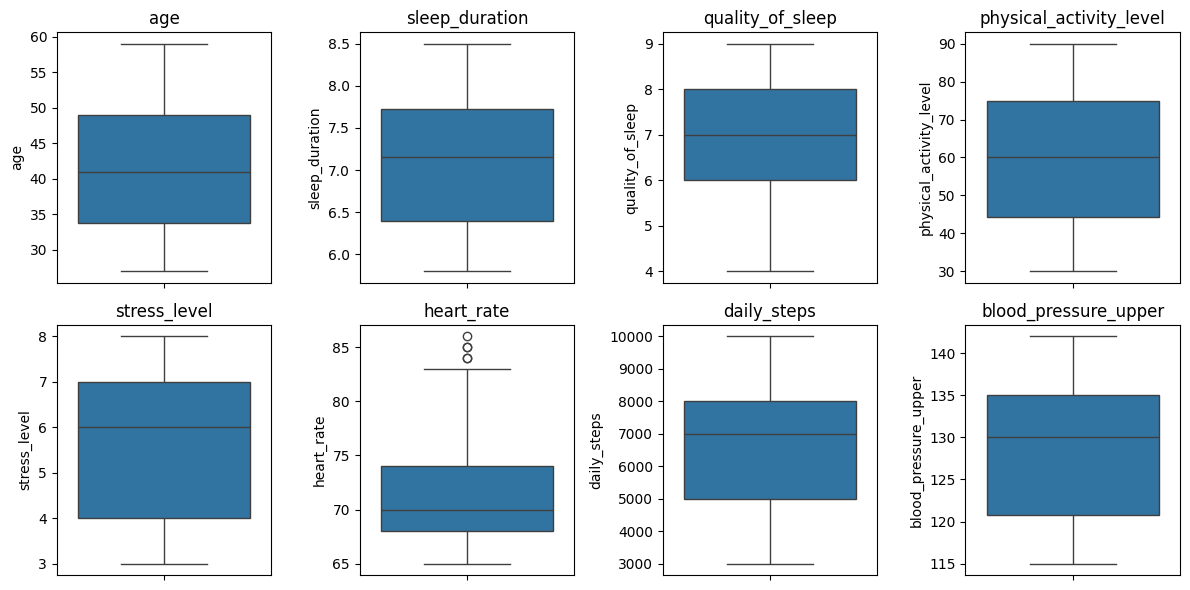

In [11]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns[:8]):  # Limit to first 8 columns
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

**Insight:**
- Proporsi nilai di setiap kolom numerik terlihat aman atau tidak bias yang mencolok.
- Kolom `Heart Rate` nampaknya menjadi satu-satunnya kolom yang memiliki outliers. Namun, perlu diperhatikan bahwa nilai outlier dari kolom tersebut masih terbilang normal dan masuk akal. Ingatlah bahwa detak jantung orang dewasa itu memang sekitara 60-100 bpm.

### Cleaning Data

#### Column Renaming
Proses ini bertujuan untuk mengubah setiap nama kolom yang ada sesuai dengan standard penamaan Python. Perubahan nama sebenarnya preferensi dari masing-masing developer, tetapi tentu untuk developer yang sudah terbiasa dengan Python akan sangat menyukainya.

In [12]:
df_clean = df.copy()

df_clean.columns = df_clean.columns.str.lower().str.replace(' ', '_')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   132 non-null    object 
 1   age                      132 non-null    int64  
 2   occupation               132 non-null    object 
 3   sleep_duration           132 non-null    float64
 4   quality_of_sleep         132 non-null    int64  
 5   physical_activity_level  132 non-null    int64  
 6   stress_level             132 non-null    int64  
 7   bmi_category             132 non-null    object 
 8   heart_rate               132 non-null    int64  
 9   daily_steps              132 non-null    int64  
 10  sleep_disorder           132 non-null    object 
 11  blood_pressure_upper     132 non-null    int64  
 12  blood_pressure_lower     132 non-null    int64  
 13  blood_pressure_category  132 non-null    object 
 14  age_group                1

#### Dropping Irrelevant Columns
Proses ini bertujuan untuk menghapus kolom-kolom yang tidak relevan atau kurang berguna untuk analisa yang akan dilakukan. Kolom yang akan dihapus pada proyek ini adalah `person_id`.

In [13]:
# df_clean.drop(columns=['person_id'], inplace=True)
# df_clean.info()

#### Handling Missing Values
Proses ini bertujuan untuk menangani seluruh nilai kosong yang ada pada dataset, tentunya penanganan yang dilakukan disesuaikan dengan keadaan data supaya tidak ada informasi berguna yang terbuang. Mengingat kolom yang memiliki nilai kosong hanya `sleep_disorder` dan telah diketahui juga dari kekosongan nilainya maka akan ditangani dengan merubah nilainya supaya lebih sesuai dengan keadaan sebenarnya.

In [14]:
df_clean.fillna({'sleep_disorder': 'No Issue'}, inplace=True)

df_clean.isnull().sum()

gender                     0
age                        0
occupation                 0
sleep_duration             0
quality_of_sleep           0
physical_activity_level    0
stress_level               0
bmi_category               0
heart_rate                 0
daily_steps                0
sleep_disorder             0
blood_pressure_upper       0
blood_pressure_lower       0
blood_pressure_category    0
age_group                  0
dtype: int64

#### Handling Incorrect Values
Proses ini bertujuan untuk menangani nilai-nilai yang kurang akurat, seperti adanya typo, ketidakkonsistenan, atau hal-hal serupa lainnya. Terlihat dari output `.value_counts()` bahwa terdapat nilai dari kolom `bmi_category` dengan makna yang sama, yaitu **Normal** dan **Normal Weight**. Bisa jadi, keduanya memang sama atau salah satunya memang ada yang salah input.

Oleh karena itu, mari kita cek deskripsi kedua nilai dari masing-masing kategori tersebut. Jika memang hampir sama, maka cukup dibuat konsisten saja salah satunya.

In [15]:
df_clean[df_clean.bmi_category == 'Normal'].describe()

,age,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,heart_rate,daily_steps,blood_pressure_upper,blood_pressure_lower
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,37.698630,7.342466,7.506849,57.698630,5.246575,69.506849,6853.424658,123.246575,80.547945
std,7.651588,0.702163,1.094472,20.685264,1.596705,3.300351,1469.890604,5.317113,3.464266
min,28.000000,6.000000,5.000000,30.000000,3.000000,65.000000,4000.000000,115.000000,75.000000
25%,31.000000,7.100000,7.000000,35.000000,4.000000,68.000000,5000.000000,120.000000,80.000000
50%,36.000000,7.400000,8.000000,60.000000,5.000000,70.000000,7000.000000,125.000000,80.000000
75%,41.000000,7.800000,8.000000,75.000000,6.000000,70.000000,8000.000000,130.000000,85.000000
max,56.000000,8.500000,9.000000,90.000000,8.000000,80.000000,10000.000000,132.000000,87.000000


In [16]:
df_clean[df_clean.bmi_category == 'Normal Weight'].describe()

,age,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,heart_rate,daily_steps,blood_pressure_upper,blood_pressure_lower
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_clean['bmi_category'] = df_clean['bmi_category'].replace('Normal Weight', 'Normal')
df_clean['bmi_category'].value_counts()

bmi_category
Normal        73
Overweight    52
Obese          7
Name: count, dtype: int64

#### Correcting Data Types
Proses ini bertujuan untuk merubah tipe data yang belum sesuai dari kolom-kolom dataset yang ada. Opsi yang akan dilakukan adalah merubah kolom yang bertipe ordinal menjadi `category`.

In [18]:
category_order = ['Normal', 'Overweight', 'Obese']

df_clean['bmi_category'] = pd.Categorical(df_clean['bmi_category'], categories=category_order, ordered=True)
df_clean['bmi_category'].dtype

CategoricalDtype(categories=['Normal', 'Overweight', 'Obese'], ordered=True, categories_dtype=object)

#### Feature Engineering
Proses ini bertujuan untuk membuat fitur baru berdasarkan fitur yang sudah ada untuk digunakan dalam analisa yang akan dilakukan. Dalam proyek ini, kita akan memisahkan nilai sistolik dan diastolik dari nilai lengkap tekanan darahnya.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   132 non-null    object 
 1   age                      132 non-null    int64  
 2   occupation               132 non-null    object 
 3   sleep_duration           132 non-null    float64
 4   quality_of_sleep         132 non-null    int64  
 5   physical_activity_level  132 non-null    int64  
 6   stress_level             132 non-null    int64  
 7   bmi_category             132 non-null    object 
 8   heart_rate               132 non-null    int64  
 9   daily_steps              132 non-null    int64  
 10  sleep_disorder           132 non-null    object 
 11  blood_pressure_upper     132 non-null    int64  
 12  blood_pressure_lower     132 non-null    int64  
 13  blood_pressure_category  132 non-null    object 
 14  age_group                1

In [20]:
# df_clean = pd.concat([df_clean, df_clean['blood_pressure'].str.split('/', expand=True)], axis=1).drop('blood_pressure', axis=1)
# df_clean = df_clean.rename(columns={0: 'blood_pressure_upper', 1: 'blood_pressure_lower'})
# df_clean['blood_pressure_upper'] = df_clean['blood_pressure_upper'].astype(int)
# df_clean['blood_pressure_lower'] = df_clean['blood_pressure_lower'].astype(int)

df_clean.head()

,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,heart_rate,daily_steps,sleep_disorder,blood_pressure_upper,blood_pressure_lower,blood_pressure_category,age_group
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Issue,126,83,Hypertension Stage 1,24-28
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Issue,125,80,Hypertension Stage 1,28-32
2,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90,Hypertension Stage 2,28-32
3,Male,28,Software Engineer,5.9,4,30,8,Obese,85,3000,Insomnia,140,90,Hypertension Stage 2,28-32
4,Male,29,Teacher,6.3,6,40,7,Obese,82,3500,Insomnia,140,90,Hypertension Stage 2,28-32


Setelah memisahkan nilai tekanan darah antara sistolik dan diastoliknya, nampaknya kita memiliki peluang untuk membuat fitur baru untuk mengategorikal tekanan darah seseorang tergolong normal atau tidak berdasarkan nilai tersebut.

In [21]:
# source: https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings

def categorize_blood_pressure(systolic, diastolic):
    if systolic < 90 or diastolic < 60:
        return "Low"
    elif 90 <= systolic < 120 and diastolic < 80:
        return "Normal"
    elif 120 <= systolic < 130 and diastolic < 80:
        return "Elevated"
    elif 130 <= systolic < 140 or 80 <= diastolic < 90:
        return "Hypertension Stage 1"
    elif 140 <= systolic < 180 or 90 <= diastolic < 120:
        return "Hypertension Stage 2"
    else:
        return "Hypertensive Crisis"

df_clean['blood_pressure_category'] = df_clean.apply(lambda row: categorize_blood_pressure(row['blood_pressure_upper'], row['blood_pressure_lower']), axis=1)
df_clean['blood_pressure_category'].value_counts()

blood_pressure_category
Hypertension Stage 1    91
Hypertension Stage 2    25
Normal                  15
Elevated                 1
Name: count, dtype: int64

In [22]:
category_order = ["Low", "Normal", "Elevated", "Hypertension Stage 1", "Hypertension Stage 2", "Hypertensive Crisis"]
df_clean['blood_pressure_category'] = pd.Categorical(df_clean['blood_pressure_category'], categories=category_order, ordered=True)

df_clean['blood_pressure_category'].dtype

CategoricalDtype(categories=['Low', 'Normal', 'Elevated', 'Hypertension Stage 1',
                  'Hypertension Stage 2', 'Hypertensive Crisis'],
, ordered=True, categories_dtype=object)

#### Handling Duplicated Data
Proses ini bertujuan untuk menghapus data kembar yang ada di dataset supaya analisa yang dilakukan ke depannya terbebas dari bias. Mengingat dataset yang dimiliki sudah cukup bersih, maka proses penghapusan duplikasi data dapat dilakukan dengan mudah.

In [23]:
df_clean.duplicated().sum()

0

In [24]:
df_clean.drop_duplicates(inplace=True)
df_clean.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

In [25]:
df_eda = df.copy()

### Univariate Analysis

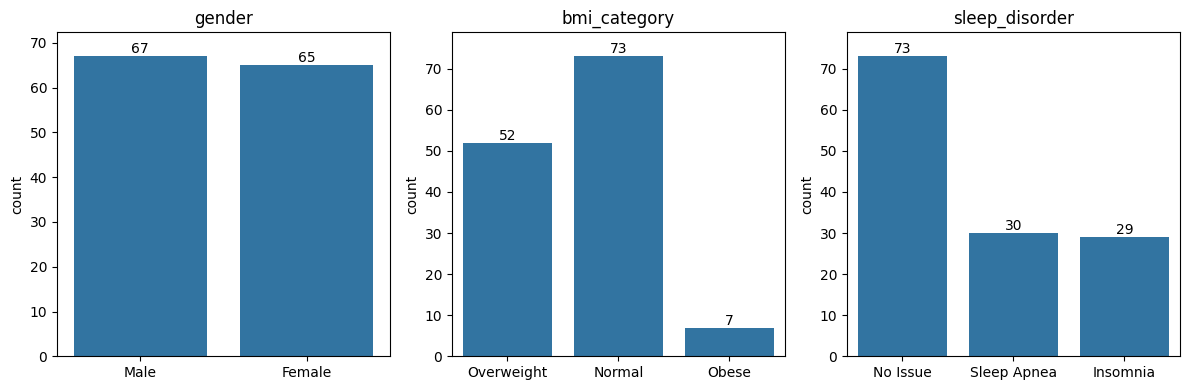

In [26]:
categorical_columns = df_eda.select_dtypes(include=['object', 'category']).columns
filtered_categorical_columns = categorical_columns.drop(['occupation', 'blood_pressure_category'])

plt.figure(figsize=(12, 4))
for i, col in enumerate(filtered_categorical_columns[:3]):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=df_eda[col])
    plt.title(col)
    plt.xlabel('')
    plt.ylim(0,df_eda[col].value_counts().max()*1.08)
    for p in plt.gca().patches:
        plt.gca().annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()

**Insight:**
- Proporsi antara pria dan wanita memang benar-benar seimbang.
- Terdapat 7 orang yang mengalami obesitas, diikuti 52 orang yang kelebihan berat badan.
- Persentase orang yang mengalami gangguan tidur mencapai 44% (59 dari 132).

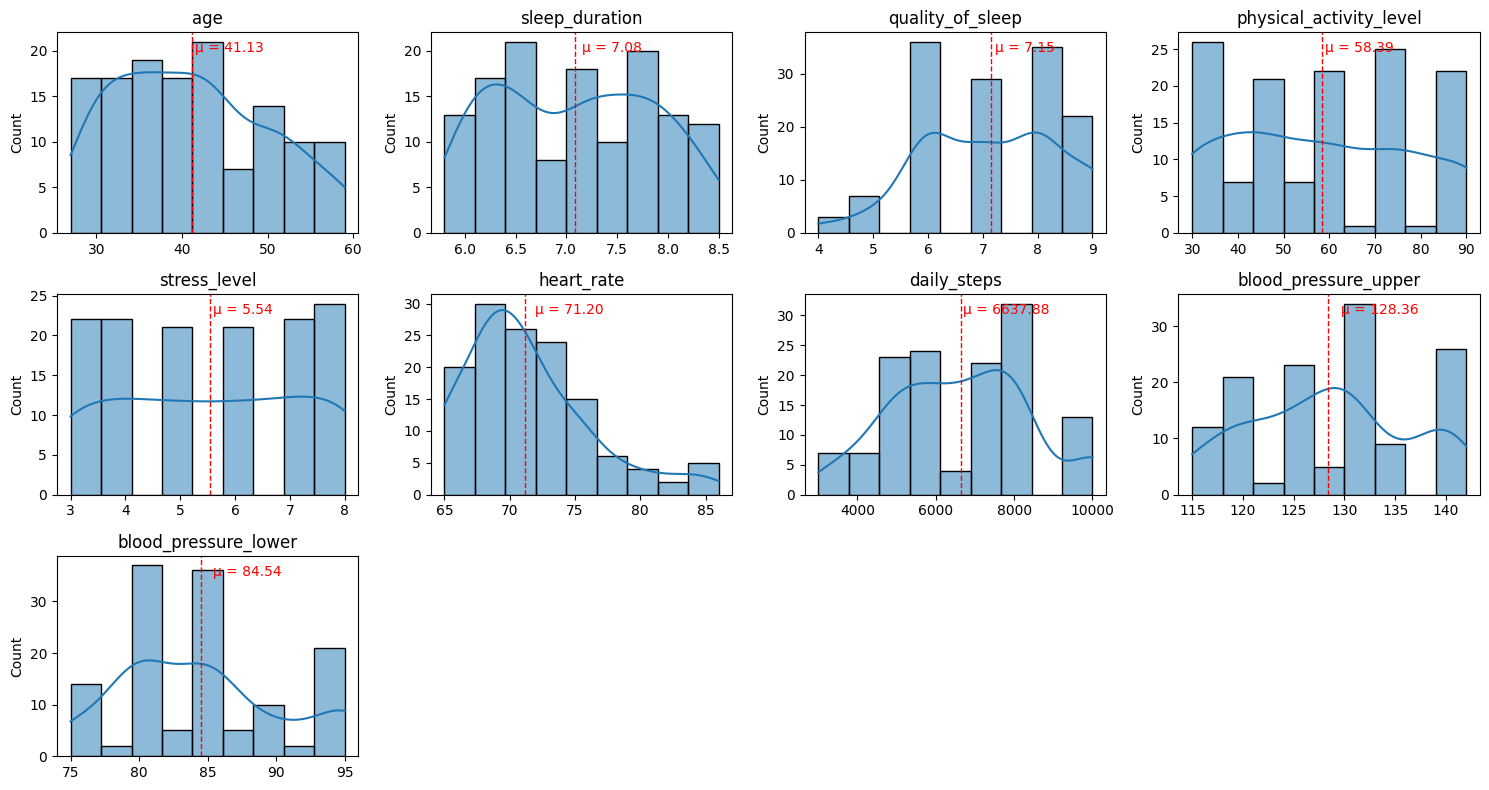

In [27]:
numerical_columns = df_eda.select_dtypes(include='number').columns

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df_eda[col], kde=True)  # Use histplot for histograms
    plt.axvline(df_eda[col].mean(), color='r', linestyle='dashed', linewidth=1)
    plt.text(df_eda[col].mean()*1.01, plt.ylim()[1] * 0.9, f'μ = {df_eda[col].mean():.2f}', color='r')
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()

**Insight:**
- Tidak ada satupun kolom numerik yang terdistribusi normal.
- Kolom `heart_rate` menjadi yang paling mencolok karena terdistribusi right-skewed.
- Secara rata-rata populasi, durasi tidur telah mencapai durasi tidur yang direkomendasikan (7-8 jam).

### Bivariate Analysis

In [28]:
def groupby_mean(data, col, *requested_type):
  """Groups data by a specified column and calculates the mean of all other columns.

  Args:
    data: The input DataFrame.
    col: The column to group by.

  Returns:
    A DataFrame with the grouped data and mean values, or None if an error occurs.
  """
  try:
    grouped = data.groupby(col, observed=False)[data.select_dtypes(list(requested_type)).columns].mean()
    grouped = grouped.dropna()
    display(grouped.T)
  except KeyError:
    print(f"Error: Column '{col}' not found in the DataFrame.")
    return None
  except Exception as e:
    print(f"An unexpected error occurred: {e}")
    return None

In [29]:
for col in categorical_columns:
  print(f'{"-"*20}{col}{"-"*20}')
  groupby_mean(df_eda, col, 'number')
  print()

--------------------gender--------------------


gender,Female,Male
age,45.830769,36.567164
sleep_duration,7.152308,7.014925
quality_of_sleep,7.446154,6.865672
physical_activity_level,59.061538,57.746269
stress_level,4.969231,6.089552
heart_rate,70.507692,71.880597
daily_steps,6707.692308,6570.149254
blood_pressure_upper,129.938462,126.835821
blood_pressure_lower,86.123077,83.000000



--------------------occupation--------------------


occupation,Accountant,Doctor,Engineer,Lawyer,Manager,Nurse,Sales Representative,Salesperson,Scientist,Software Engineer,Teacher
age,39.363636,33.291667,45.181818,39.133333,45.0,48.241379,28.0,43.333333,33.5,30.000000,39.800000
sleep_duration,7.136364,7.050000,7.800000,7.380000,6.9,6.965517,5.9,6.422222,6.0,6.500000,6.720000
quality_of_sleep,7.909091,6.750000,8.136364,7.733333,7.0,7.068966,4.0,6.000000,5.0,6.000000,6.800000
physical_activity_level,57.727273,58.125000,51.909091,69.000000,55.0,73.172414,30.0,45.000000,41.0,44.000000,45.000000
stress_level,4.818182,6.541667,4.227273,5.133333,5.0,5.758621,8.0,7.000000,7.0,6.333333,5.000000
heart_rate,69.090909,71.708333,68.181818,71.400000,75.0,72.862069,85.0,72.000000,78.5,77.333333,69.133333
daily_steps,6890.909091,7050.000000,5945.454545,7073.333333,5500.0,7558.620690,3000.0,6000.000000,5350.0,5066.666667,5780.000000
blood_pressure_upper,118.363636,123.083333,125.318182,130.200000,125.0,136.275862,140.0,130.000000,129.5,128.666667,129.733333
blood_pressure_lower,77.363636,80.750000,81.227273,85.200000,82.0,91.793103,90.0,85.000000,85.5,84.333333,85.466667



--------------------bmi_category--------------------


bmi_category,Normal,Obese,Overweight
age,37.698630,36.428571,46.576923
sleep_duration,7.342466,6.900000,6.742308
quality_of_sleep,7.506849,6.285714,6.769231
physical_activity_level,57.698630,52.857143,60.115385
stress_level,5.246575,5.857143,5.903846
heart_rate,69.506849,84.142857,71.846154
daily_steps,6853.424658,3328.571429,6780.769231
blood_pressure_upper,123.246575,138.714286,134.153846
blood_pressure_lower,80.547945,89.857143,89.423077



--------------------sleep_disorder--------------------


sleep_disorder,Insomnia,No Issue,Sleep Apnea
age,41.620690,39.452055,44.733333
sleep_duration,6.679310,7.300000,6.943333
quality_of_sleep,6.517241,7.520548,6.866667
physical_activity_level,48.103448,58.712329,67.566667
stress_level,6.034483,5.178082,5.933333
heart_rate,72.206897,69.547945,74.266667
daily_steps,5755.172414,6861.643836,6946.666667
blood_pressure_upper,131.724138,124.356164,134.866667
blood_pressure_lower,86.413793,81.547945,90.000000



--------------------blood_pressure_category--------------------


blood_pressure_category,Elevated,Hypertension Stage 1,Hypertension Stage 2,Normal
age,41.0,39.153846,50.32,37.800000
sleep_duration,7.3,7.084615,6.92,7.326667
quality_of_sleep,8.0,7.021978,7.08,8.000000
physical_activity_level,70.0,52.703297,76.20,62.466667
stress_level,6.0,5.637363,5.88,4.333333
heart_rate,72.0,70.989011,73.76,68.200000
daily_steps,6200.0,6270.329670,7640.00,7226.666667
blood_pressure_upper,121.0,127.274725,140.08,115.933333
blood_pressure_lower,79.0,83.406593,94.28,75.533333



--------------------age_group--------------------


age_group,24-28,28-32,32-36,36-40,40-44,44-48,48-52,52-56,56-60
age,27.0,29.681818,33.411765,37.304348,42.095238,44.416667,49.6875,53.1,58.0
sleep_duration,6.1,6.900000,6.800000,7.130435,7.214286,6.575000,6.6250,8.0,8.1
quality_of_sleep,6.0,6.136364,6.823529,7.478261,7.238095,6.666667,6.6875,8.6,9.0
physical_activity_level,42.0,53.636364,48.058824,57.043478,67.952381,44.583333,78.4375,37.5,76.5
stress_level,6.0,6.772727,6.000000,4.826087,5.714286,5.500000,6.7500,3.9,3.0
heart_rate,77.0,73.818182,71.588235,70.478261,70.714286,69.250000,74.7500,67.1,67.7
daily_steps,4200.0,6522.727273,5917.647059,6656.521739,6957.142857,5875.000000,8325.0000,5200.0,7300.0
blood_pressure_upper,126.0,125.045455,124.117647,123.217391,128.047619,132.083333,137.2500,127.5,137.8
blood_pressure_lower,83.0,82.363636,80.823529,80.826087,83.761905,87.250000,91.8750,82.5,93.0


**Insight:**
- Statistik berdasarkan jenis kelamin:
  - Tidak ada perbedaan yang signifikan.
  - Wanita memiliki kualitas tidur yang sedikit lebih baik dan lebih aktif bergerak dibandingkan pria.
  - Pria nampaknya sedikit lebih stress dibandingkan wanita.
- Statistik berdasarkan pekerjaan:
  - Engineer menjadi pekerjaan dengan durasi dan kualitas tidur paling baik, sedangkan Sales Representative sebaliknya.
  - Engineer juga menjadi pekerjaan dengan stress level terkecil, sedangkan Sales Representative sebaliknya.
- Statistik berdasarkan BMI:
  - Mereka yang obesitas memiliki kualitas tidur terburuk, detak jantung yang lebih tinggi, dan lebih mageran (langkahnya lebih sedikit).
- Statistik berdasarkan gangguan tidur:
  - Mereka yang mengidap gangguan tidur cenderung lebih stres dan kualitas tidurnya lebih buruk dari mereka yang tidak mengidap gangguan tidur.
- Statistik berdasarkan tekanan darah:
  - Mereka yang bertekanan darah tinggi rata-rata berusia 40+.

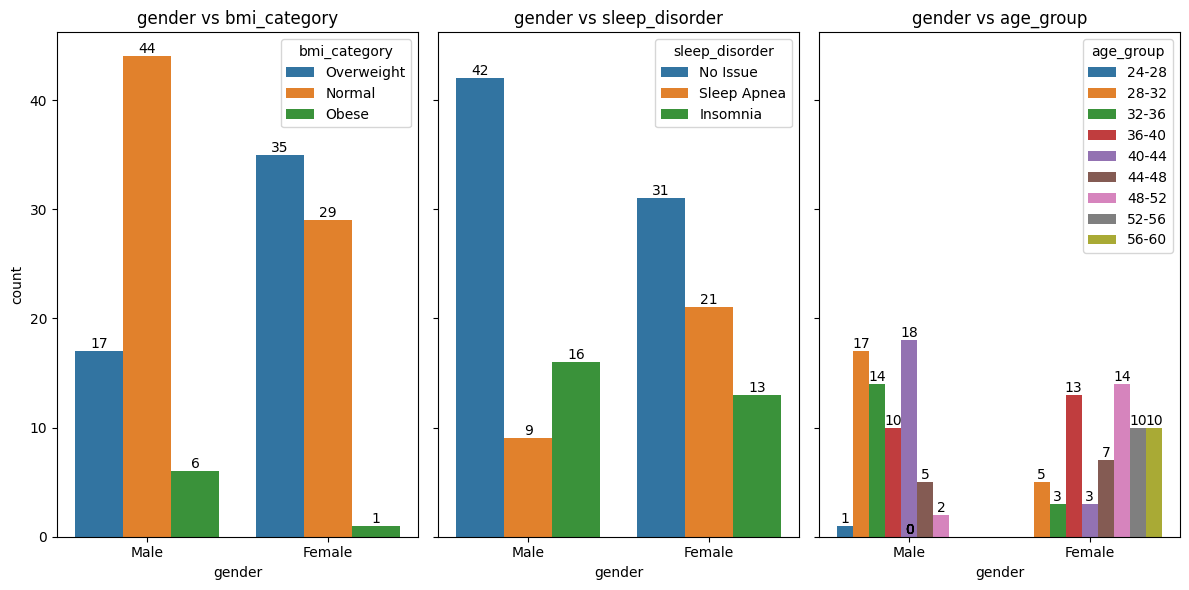

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharey=True)

pairs = [(filtered_categorical_columns[i], filtered_categorical_columns[j])
         for i in range(len(filtered_categorical_columns))
         for j in range(i + 1, len(filtered_categorical_columns))]

for subplot_index, (col1, col2) in enumerate(pairs[:3]):
    ax = axes[subplot_index]
    count_data = sns.countplot(x=col1, hue=col2, data=df_eda, ax=ax)
    ax.set_title(f'{col1} vs {col2}')

    for p in count_data.patches[:-3]:
        ax.annotate(int(p.get_height()),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Insight:**
- Wanita lebih banyak yang kelebihan berat badan dibandingkan pria, tetapi prialah yang cenderung mengalami obesitas.
- Proporsi antara pria dan wanita yang mengalami Insomnia tidak jauh berbeda dan jumlah wanita lebih banyak yang mengalami Sleep Apnea dibandingkan pria.
- Gangguan tidur lebih banyak terjadi kepada mereka yang memiliki kelebihan berat badan.

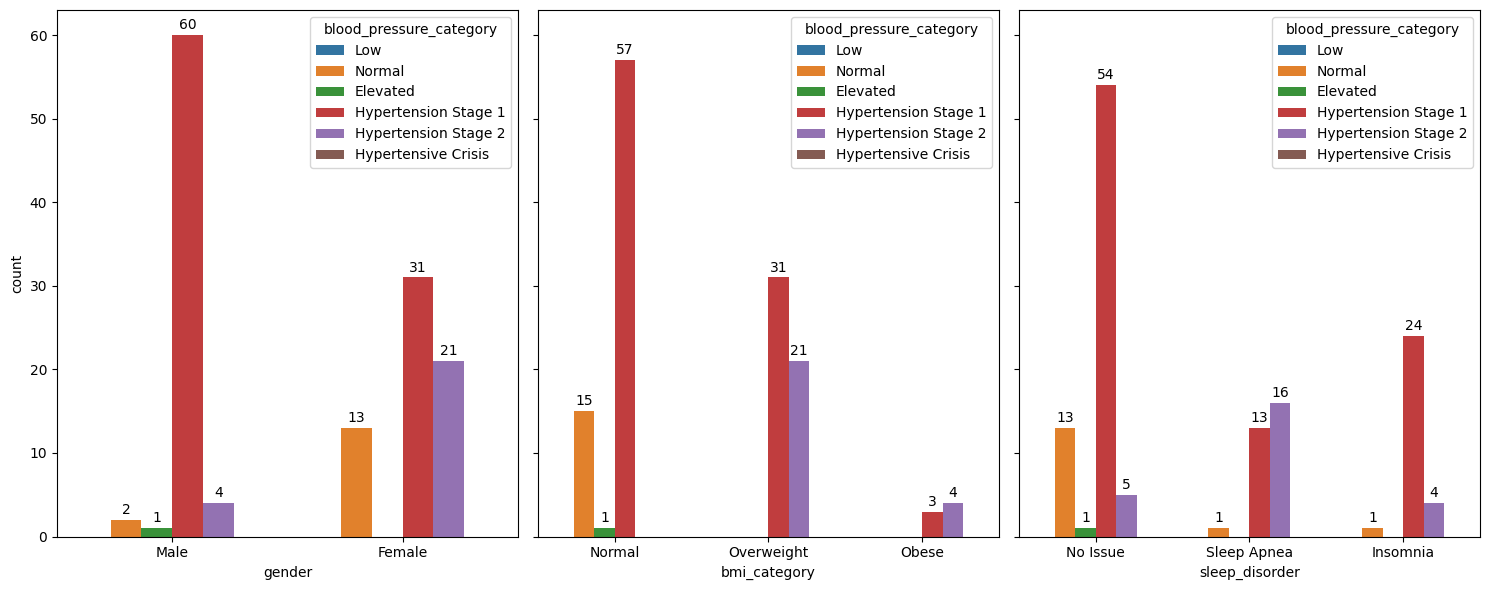

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
for i, col in enumerate(filtered_categorical_columns[:3]):
    count_data = sns.countplot(data=df_clean, hue='blood_pressure_category', x=col, ax=axes[i])

    for p in count_data.patches:
        if p.get_height() > 0 : #check for data that have no value
            axes[i].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                            ha='center', va='bottom', xytext=(0, 2), textcoords='offset points')
plt.tight_layout()
plt.show()

**Insight:**
- Pria lebih condong mengidap hipertensi tahap 1 dan wanita mengidap hipertensi tahap 2.
- Mereka yang memiliki kelebihan berat badan condong mengidap hipertensi tahap 2.
- Mereka yang mengalami gangguan tidur juga condong mengidap hipertensi tahap 2.

### Multivariate Analysis

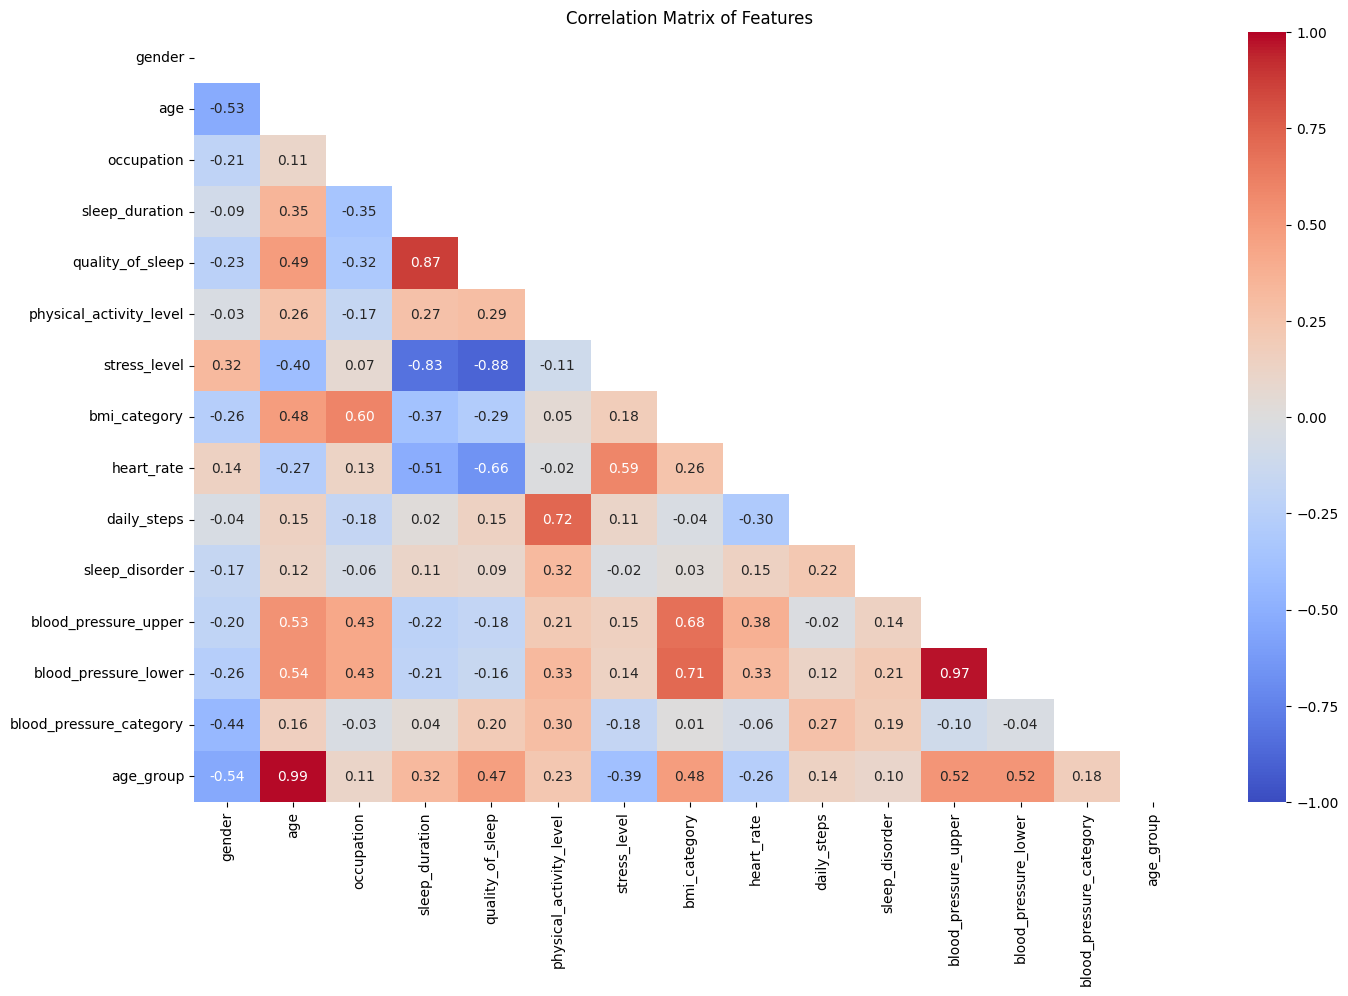

In [32]:
le = LabelEncoder()
for col in categorical_columns:
    df_eda[col] = le.fit_transform(df_eda[col])

correlation_matrix = df_eda.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')
plt.show()

**Insight:**
- Semakin lama durasi tidurnya maka semakin berkualitas tidurnya (hubungan kuat positif).
- Semakin lama durasi tidurnya maka semakin berkurang stressnya (hubungan kuat negatif).
- Semakin tua usianya maka semakin berkurang stressnya (hubungan lemah positif).
- Ada hubungan positif yang cukup kuat antara kategori BMI dengan pekerjaan dan tekanan darah.
- Ada hubungan negatif yang lemah antara kategori tekanan darah dengan jenis kelamin.

## Visualization

### Apa saja jenis pekerjaan yang dilakukan oleh individu dalam kelompok umur yang memiliki langkah harian terendah dibandingkan dengan mereka yang berada dalam kelompok umur dengan langkah harian tertinggi?

In [33]:
def create_age_groups(dataframe, age_column, bin_size=4):
    """
    Creates age groups in the DataFrame based on dynamic bins.

    Parameters:
        dataframe (pd.DataFrame): The input DataFrame containing age data.
        age_column (str): The column name representing age.
        bin_size (int): The size of the age bins (default is 4).

    Returns:
        pd.DataFrame: The DataFrame with an additional column for age groups.
    """
    # Determine the min and max age values
    min_age = dataframe[age_column].min()
    max_age = dataframe[age_column].max()

    # Adjust min_age to the nearest lower multiple of bin_size
    if min_age % bin_size != 0:
        min_age = min_age - (min_age % bin_size)

    # Adjust max_age to the nearest upper multiple of bin_size
    if max_age % bin_size != 0:
        max_age = max_age + (bin_size - (max_age % bin_size))

    # Create dynamic bins and labels
    bins = np.arange(min_age, max_age + bin_size, bin_size)
    labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins) - 1)]

    # Create age categories in DataFrame
    dataframe['age_group'] = pd.cut(dataframe[age_column], bins=bins, labels=labels, right=False)
    return dataframe

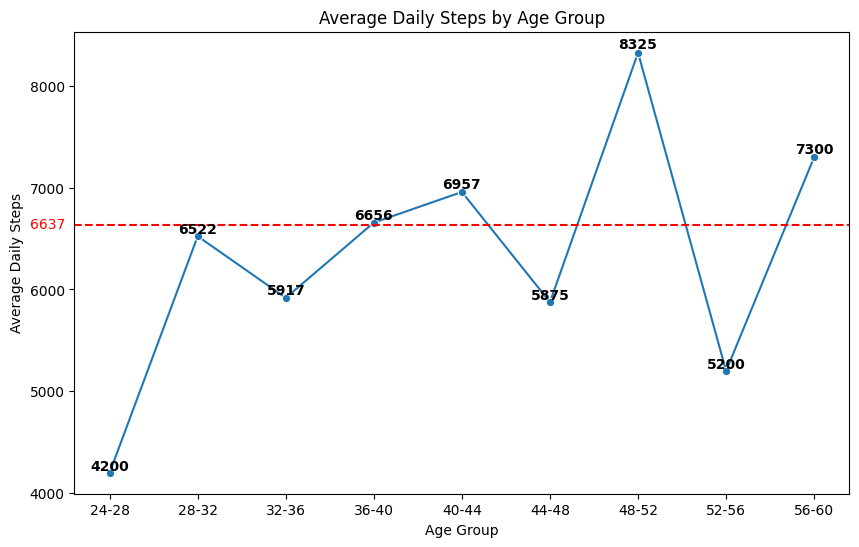

In [34]:
# Create age categories
df_visual = create_age_groups(df_eda, 'age')

# Calculate the average daily steps for each age group
average_steps_by_age = df_visual.groupby('age_group', observed=False)['daily_steps'].mean().reset_index()

# Visualize the average daily steps by age group
plt.figure(figsize=(10, 6))
sns.lineplot(x='age_group', y='daily_steps', data=average_steps_by_age, marker='o')

for index, row in average_steps_by_age.iterrows():
    plt.text(row['age_group'], row['daily_steps'] * 1.005, int(row["daily_steps"]),
             horizontalalignment='center', size='medium', color='black', weight='semibold')

# Calculate overall mean of daily steps
overall_mean = df_visual['daily_steps'].mean()

# Add horizontal line for overall mean
plt.axhline(y=overall_mean, color='r', linestyle='--')

# Annotate the mean value on the y-axis
plt.text(x=-0.5, y=overall_mean, s=int(overall_mean),
         color='r', ha='right', va='center')

plt.title('Average Daily Steps by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Daily Steps')
plt.show()

In [35]:
display(df_visual[df_visual['age_group'] == '24-28']['occupation'].value_counts())
display(df_visual[df_visual['age_group'] == '48-52']['occupation'].value_counts())

occupation
9    1
Name: count, dtype: int64

occupation
5    12
1     2
2     2
Name: count, dtype: int64

**Insight:**
- Terlihat kelompok usia paling mageran atau kurang aktif bergerak itu yang rentang usianya 24-28 tahun. Kebetulan orang tersebut bekerja sebagai Software Engineer.
- Kelompok usia paling aktif bergerak itu yang rentang usianya 48-52 tahun. Kebetulan orang-orang tersebut bekerja di sektor kesehatan.

### Apa saja jenis pekerjaan yang dilakukan oleh individu dalam kelompok umur yang memiliki rata-rata waktu tidur lebih dari rata-rata waktu tidur populasi?

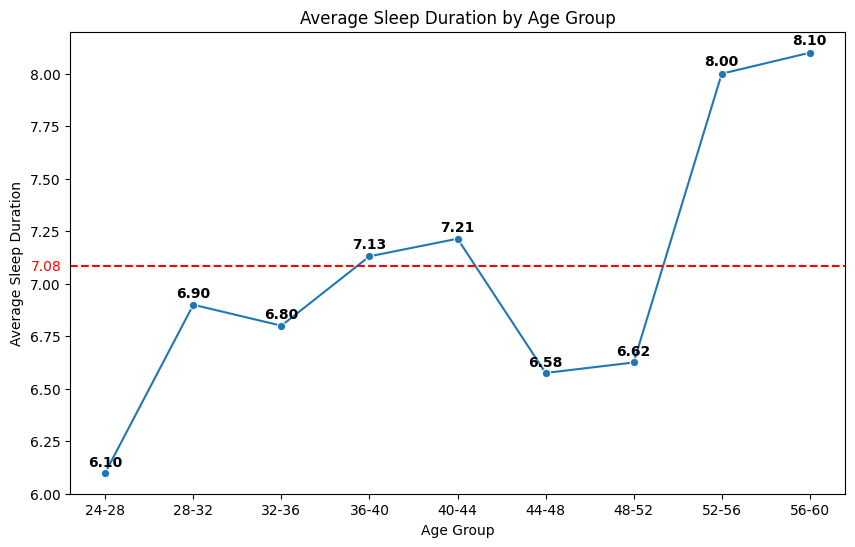

In [36]:
# Calculate the average daily sleep_duration for each age group
average_sleep_duration_by_age = df_visual.groupby('age_group', observed=False)['sleep_duration'].mean().reset_index()

# Visualize the average daily sleep_duration by age group
plt.figure(figsize=(10, 6))
sns.lineplot(x='age_group', y='sleep_duration', data=average_sleep_duration_by_age, marker='o')

for index, row in average_sleep_duration_by_age.iterrows():
    plt.text(row['age_group'], row['sleep_duration'] * 1.005, f'{row["sleep_duration"]:.2f}',
             horizontalalignment='center', size='medium', color='black', weight='semibold')

# Calculate overall mean of daily steps
overall_mean = df_visual['sleep_duration'].mean()

# Add horizontal line for overall mean
plt.axhline(y=overall_mean, color='r', linestyle='--')

# Annotate the mean value on the y-axis
plt.text(x=-0.5, y=overall_mean, s=f'{overall_mean:.2f}',
         color='r', ha='right', va='center')

plt.title('Average Sleep Duration by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Sleep Duration')
plt.show()

In [37]:
question_two = df_visual[df_visual['age_group'].isin(['36-40', '40-44', '52-56', '56-60'])]['occupation'].value_counts()
question_two.to_frame().style.background_gradient(cmap='coolwarm')

,count
occupation,
2,16
3,14
5,12
0,9
10,7
7,5
1,1


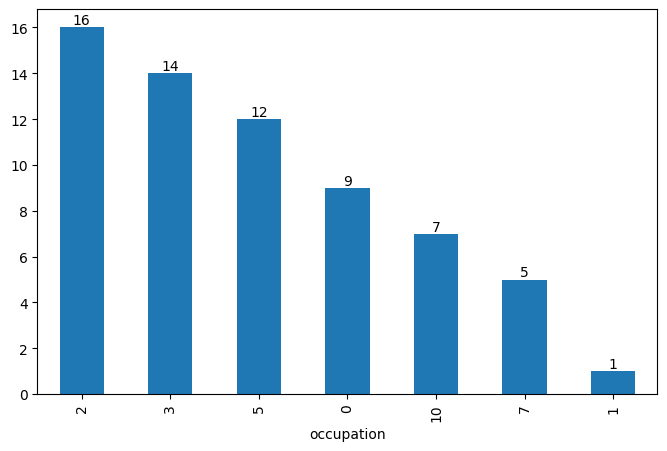

In [38]:
question_two.plot(kind='bar', figsize=(8, 5))

for i, v in enumerate(question_two):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

**Insight:**
- Kelompok usia yang rata-rata durasi tidurnya sesuai rekomendasi adalah kelompok usia 36-44 dan 52-60.
- Dari kelompok usia yang dimaksud tersebut, kebanyakan di antaranya bekerja sebagai Engineer, Pengacara, dan Suster.

### Apa kategori BMI yang paling banyak ditemukan di antara individu dengan pekerjaan di sektor kesehatan?

In [39]:
healthcare_occupations = ['Doctor', 'Nurse']
healthcare_df = df_clean[df_clean['occupation'].isin(healthcare_occupations)]

bmi_counts = healthcare_df['bmi_category'].value_counts()
bmi_counts

bmi_category
Normal        29
Overweight    22
Obese          2
Name: count, dtype: int64

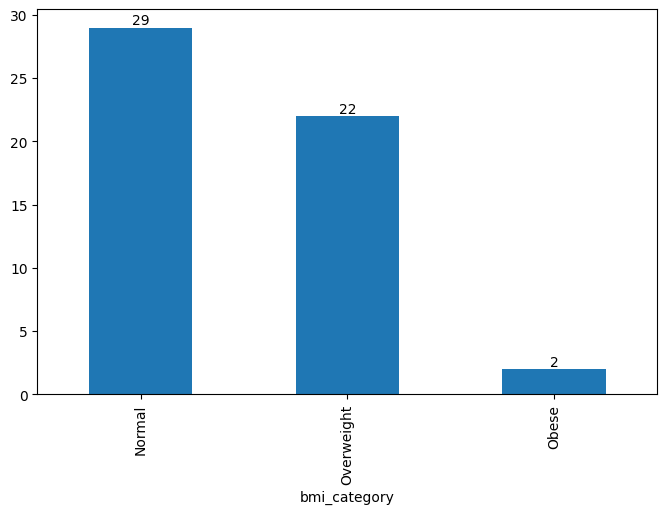

In [40]:
bmi_counts.plot(kind='bar', figsize=(8, 5))

for i, v in enumerate(bmi_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

In [41]:
healthcare_pivot = healthcare_df.pivot_table(index='bmi_category', columns='occupation', aggfunc='size', fill_value=0, observed=False)
healthcare_pivot

occupation,Doctor,Nurse
bmi_category,,
Normal,22,7
Overweight,0,22
Obese,2,0


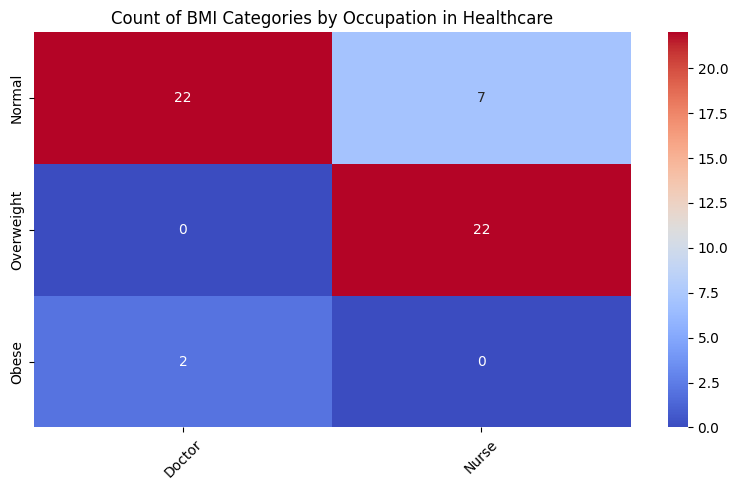

In [42]:
plt.figure(figsize=(8, 5))
sns.heatmap(healthcare_pivot, annot=True, fmt='d', cmap='coolwarm')
plt.title('Count of BMI Categories by Occupation in Healthcare')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**
- Jumlah pekerja di sektor kesehatan yang memiliki berat badan berlebih mencapai 22 orang dan 2 orang mengalami obesitas.
- Yang mengalami berat badan berlebih adalah para suster. Sedangkan yang mengalami obesitas adalah para dokter.

### Apa sektor pekerjaan yang memiliki proporsi tertinggi individu yang mengalami insomnia?

In [43]:
# Filter for individuals with insomnia
insomnia_df = df_visual[df_visual['sleep_disorder'] == 'Insomnia']

# Count the number of individuals with insomnia by occupation
insomnia_counts = insomnia_df['occupation'].value_counts().reset_index()
insomnia_counts.columns = ['occupation', 'count']

# Create a treemap
fig = px.treemap(insomnia_counts,
                 path=['occupation'],
                 values='count',
                 title='Treemap of Occupations with Individuals Experiencing Insomnia')
fig.update_traces(hovertemplate='label=%{label}<br>total=%{value}<extra></extra>')
fig.show()

**Insight:**
- Sektor pekerjaan yang paling banyak mengalami insomnia adalah pendidikan sebanyak 10 orang guru.
- Kemudiaan diikuti sektor sales sebanyak 6 orang dan Engineer sebanyak 5 orang.

### Dari berbagai pekerjaan, yang manakah paling umum di antara individu dalam kategori "Overweight"?

In [44]:
# Filter for individuals in the 'Overweight' category
overweight_df = df_visual[df_visual['bmi_category'] == 'Overweight']

# Count the frequency of each occupation in the 'Overweight' category
occupation_counts = overweight_df['occupation'].value_counts().reset_index()
occupation_counts.columns = ['occupation', 'count']

# Create a treemap to visualize the occupations of individuals in the 'Overweight' category
fig = px.treemap(occupation_counts,
                 path=['occupation'],
                 values='count',
                 title='Treemap of Occupations for Individuals in Overweight Category')
fig.update_traces(hovertemplate='label=%{label}<br>total=%{value}<extra></extra>')
fig.show()

**Insight:**
- Pekerjaan yang individunya memiliki berat badan berlebih terbanyak adalah suster sejumlah 22 orang.
- Kemudian diikuti oleh 11 guru dan 9 salesperson.

### Export Dataset Akhir
Dataset akhir ini di-ekspor untuk digunakan sebagai dataset pada dashboard Streamlit yang dikembangkan.

In [45]:
df_visual.to_csv('sleep_health_new.csv', index=False)

In [46]:
df_visual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   gender                   132 non-null    int32   
 1   age                      132 non-null    int64   
 2   occupation               132 non-null    int32   
 3   sleep_duration           132 non-null    float64 
 4   quality_of_sleep         132 non-null    int64   
 5   physical_activity_level  132 non-null    int64   
 6   stress_level             132 non-null    int64   
 7   bmi_category             132 non-null    int32   
 8   heart_rate               132 non-null    int64   
 9   daily_steps              132 non-null    int64   
 10  sleep_disorder           132 non-null    int32   
 11  blood_pressure_upper     132 non-null    int64   
 12  blood_pressure_lower     132 non-null    int64   
 13  blood_pressure_category  132 non-null    int32   
 14  age_group 